<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_05_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 05 - Recurrent Neuron Network RNN

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 5 – Redes Neurais Recoorentes (VAE)

Implementar um modelo LSTM ou GRU para uma das tarefas abaixo:

1. Classificação de série temporais. O modelo deve receber uma
janela temporal (qualquer tipo de dado) e classificar o conteúdo
da janela.

2. Previsão. Treinar um modelo para predizer o valor de uma
variável no instante t+k. O modelo deve receber os dados da
série temporal (instantes anteriores a t – verificar tamanho da
janela) e predizer um favor futuro. k a distância da predição. Por
exemplo, podemos alimentar um modelo com dados de uma
dada empresa (i.e. PETR3) e tentar predizer qual será o valor da
ação daqui 5 dias (k==5)

3. Autoencoder recorrente. O modelo deve mapear a série
temporal na própria série. O objetivo será avaliar como os dados
estão representados no espaço latente

# Project Report

## Introduction 

https://towardsdatascience.com/time-series-classification-for-human-activity-recognition-with-lstms-using-tensorflow-2-and-keras-b816431afdff

https://heartbeat.comet.ml/anomaly-detection-using-lstm-autoencoder-b03289895fef

## Metodology 

## Parametes Explorations

## Datasets

## Plots and Results

## Extras

# Project Code

In [30]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from scipy import stats
import seaborn as sns

In [ ]:
!gdown --id 152sWECukjvLerrVG2NUO8gtMFg83RKCF --output WISDM_ar_latest.tar.gz 
!tar -xvf WISDM_ar_latest.tar.gz

In [8]:
column_names = [
  'user_id',
  'activity',
  'timestamp',
  'x_axis',
  'y_axis',
  'z_axis'
]

df = pd.read_csv(
  'WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt',
  header=None,
  names=column_names
)

df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
df['z_axis'] = df.z_axis.astype(np.float64)
df.dropna(axis=0, how='any', inplace=True)
df.shape

(1098203, 6)

In [48]:
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [61]:
user1 = df[df['user_id']==33]

In [62]:
user1

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
467623,33,Sitting,774582347000,5.860000,2.180000,7.740000
467624,33,Sitting,774632335000,6.020000,2.410000,7.890000
467625,33,Sitting,774682292000,5.860000,2.410000,7.780000
467626,33,Sitting,774732310000,5.710000,2.300000,7.780000


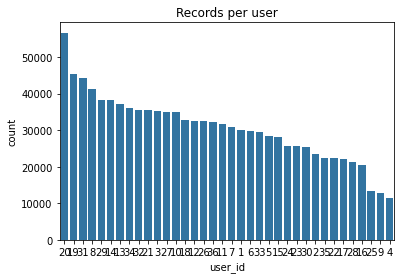

In [47]:
sns.countplot(x = 'user_id',
              data = df,
              palette=[sns.color_palette()[0]],
              order = df.user_id.value_counts().index);
plt.title("Records per user");

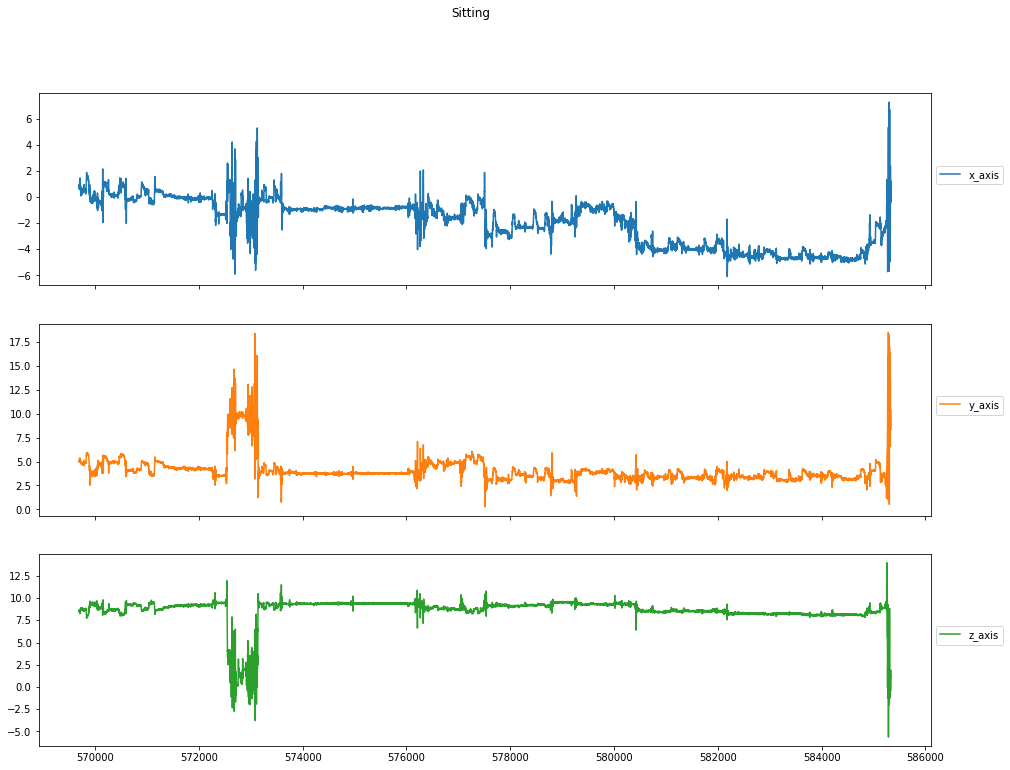

In [65]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x_axis', 'y_axis', 'z_axis']][:]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity("Sitting", df[df['user_id']==20]);

In [9]:
df_train = df[df['user_id'] <= 30]
df_test = df[df['user_id'] > 30]

In [12]:
scale_columns = ['x_axis', 'y_axis', 'z_axis']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(
  df_train[scale_columns].to_numpy()
)

df_test.loc[:, scale_columns] = scaler.transform(
  df_test[scale_columns].to_numpy()
)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [13]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)
    

In [17]:
TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(
    df_train[['x_axis', 'y_axis', 'z_axis']],
    df_train.activity,
    TIME_STEPS,
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x_axis', 'y_axis', 'z_axis']],
    df_test.activity,
    TIME_STEPS,
    STEP
)

In [18]:
print(X_train.shape, y_train.shape)

(22454, 200, 3) (22454, 1)


In [21]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [23]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [24]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
632/632 [==============================] - 197s 300ms/step - loss: 1.4633 - acc: 0.5091 - val_loss: 1.2950 - val_acc: 0.5303
Epoch 2/20
632/632 [==============================] - 188s 297ms/step - loss: 1.2081 - acc: 0.5779 - val_loss: 1.0793 - val_acc: 0.6380
Epoch 3/20
632/632 [==============================] - 188s 298ms/step - loss: 1.0042 - acc: 0.6702 - val_loss: 0.9517 - val_acc: 0.7061
Epoch 4/20
632/632 [==============================] - 189s 299ms/step - loss: 0.8392 - acc: 0.7162 - val_loss: 1.2745 - val_acc: 0.6202
Epoch 5/20
632/632 [==============================] - 190s 300ms/step - loss: 0.8095 - acc: 0.7274 - val_loss: 0.7074 - val_acc: 0.7654
Epoch 6/20
632/632 [==============================] - 189s 298ms/step - loss: 0.7325 - acc: 0.7420 - val_loss: 0.7453 - val_acc: 0.7418
Epoch 7/20
632/632 [==============================] - 188s 298ms/step - loss: 0.6793 - acc: 0.7490 - val_loss: 1.2223 - val_acc: 0.7801
Epoch 8/20
632/632 [============================

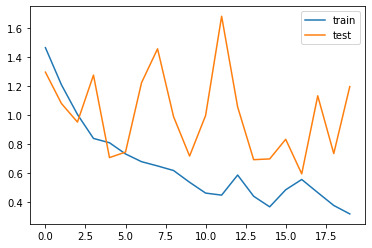

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [26]:
model.evaluate(X_test, y_test)

156/156 [==============================] - 12s 72ms/step - loss: 1.1447 - acc: 0.7520


[1.1446508169174194, 0.7520031929016113]

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

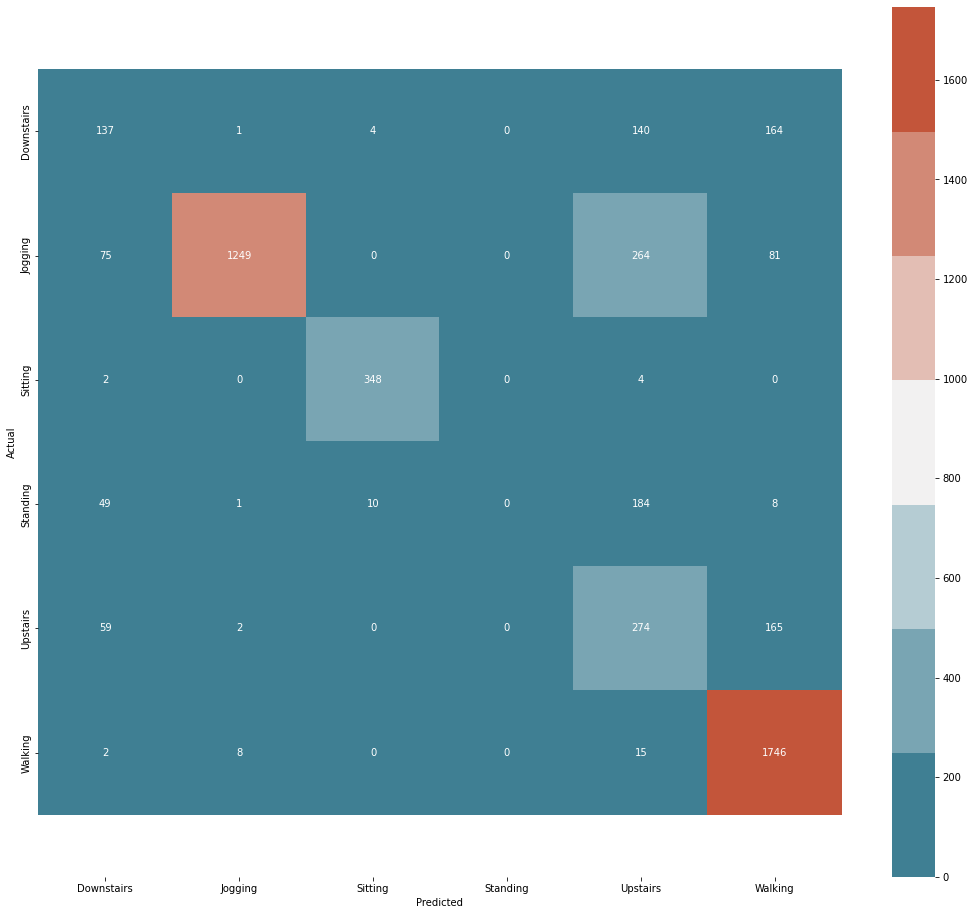

In [31]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

https://www.w3schools.com/python/python_classes.asp

https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73?gi=21e42fd28916

https://www.kaggle.com/code/phelpsmemo/cap-351-neurocomputacao-projeto4-autoencoder

https://www.kaggle.com/code/rvislaywade/visualizing-mnist-using-a-variational-autoencoder

https://youtu.be/Ey8IZQl_lKs


